In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/customer/customercon_data1_1.xlsx')
data.head()

,year,TopSalesAmount,TopFiveSalesAmount,GrossRevenue,TopCustomerToTotalRatio,CustomerConcentration,CustomerConcentrationHHI,SupplyChainConcentration
0,2012,1.058796e+09,1.900515e+09,1.030000e+11,1.030,1.85,0.012397,0.93
1,2013,1.189264e+09,2.823094e+09,1.350000e+11,0.880,2.09,0.012699,1.05
2,2014,1.325572e+08,1.210000e+09,1.460000e+11,9.675,0.83,1.876500,1.92
3,2015,1.325572e+08,2.697000e+09,1.960000e+11,9.675,2.98,1.876500,1.99
4,2016,1.325572e+08,2.140000e+09,2.400000e+11,9.675,0.90,1.876500,1.49


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/customer/customercon_data1_1.xlsx')

# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Display columns with their respective count of null values
null_counts = data[null_columns].isnull().sum()

print("Columns with null values:\n")
print(null_counts)


Columns with null values:

Series([], dtype: float64)


In [ ]:
X = data.drop(['CustomerConcentration'], axis=1)
y = data['CustomerConcentration']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


       year  TopSalesAmount  TopFiveSalesAmount  GrossRevenue  \
0      2012    1.058796e+09        1.900515e+09  1.030000e+11   
1      2013    1.189264e+09        2.823094e+09  1.350000e+11   
2      2014    1.325572e+08        1.210000e+09  1.460000e+11   
3      2015    1.325572e+08        2.697000e+09  1.960000e+11   
4      2016    1.325572e+08        2.140000e+09  2.400000e+11   
...     ...             ...                 ...           ...   
27252  2015    4.788678e+07        5.207224e+07  5.207224e+07   
27253  2017    1.325572e+08        9.811000e+07  9.811317e+07   
27254  2018    1.325572e+08        1.061100e+08  1.061131e+08   
27255  2019    1.325572e+08        1.050200e+08  1.050223e+08   
27256  2020    1.325572e+08        9.941000e+07  9.940559e+07   

       TopCustomerToTotalRatio  CustomerConcentrationHHI  \
0                        1.030                  0.012397   
1                        0.880                  0.012699   
2                        9.675         

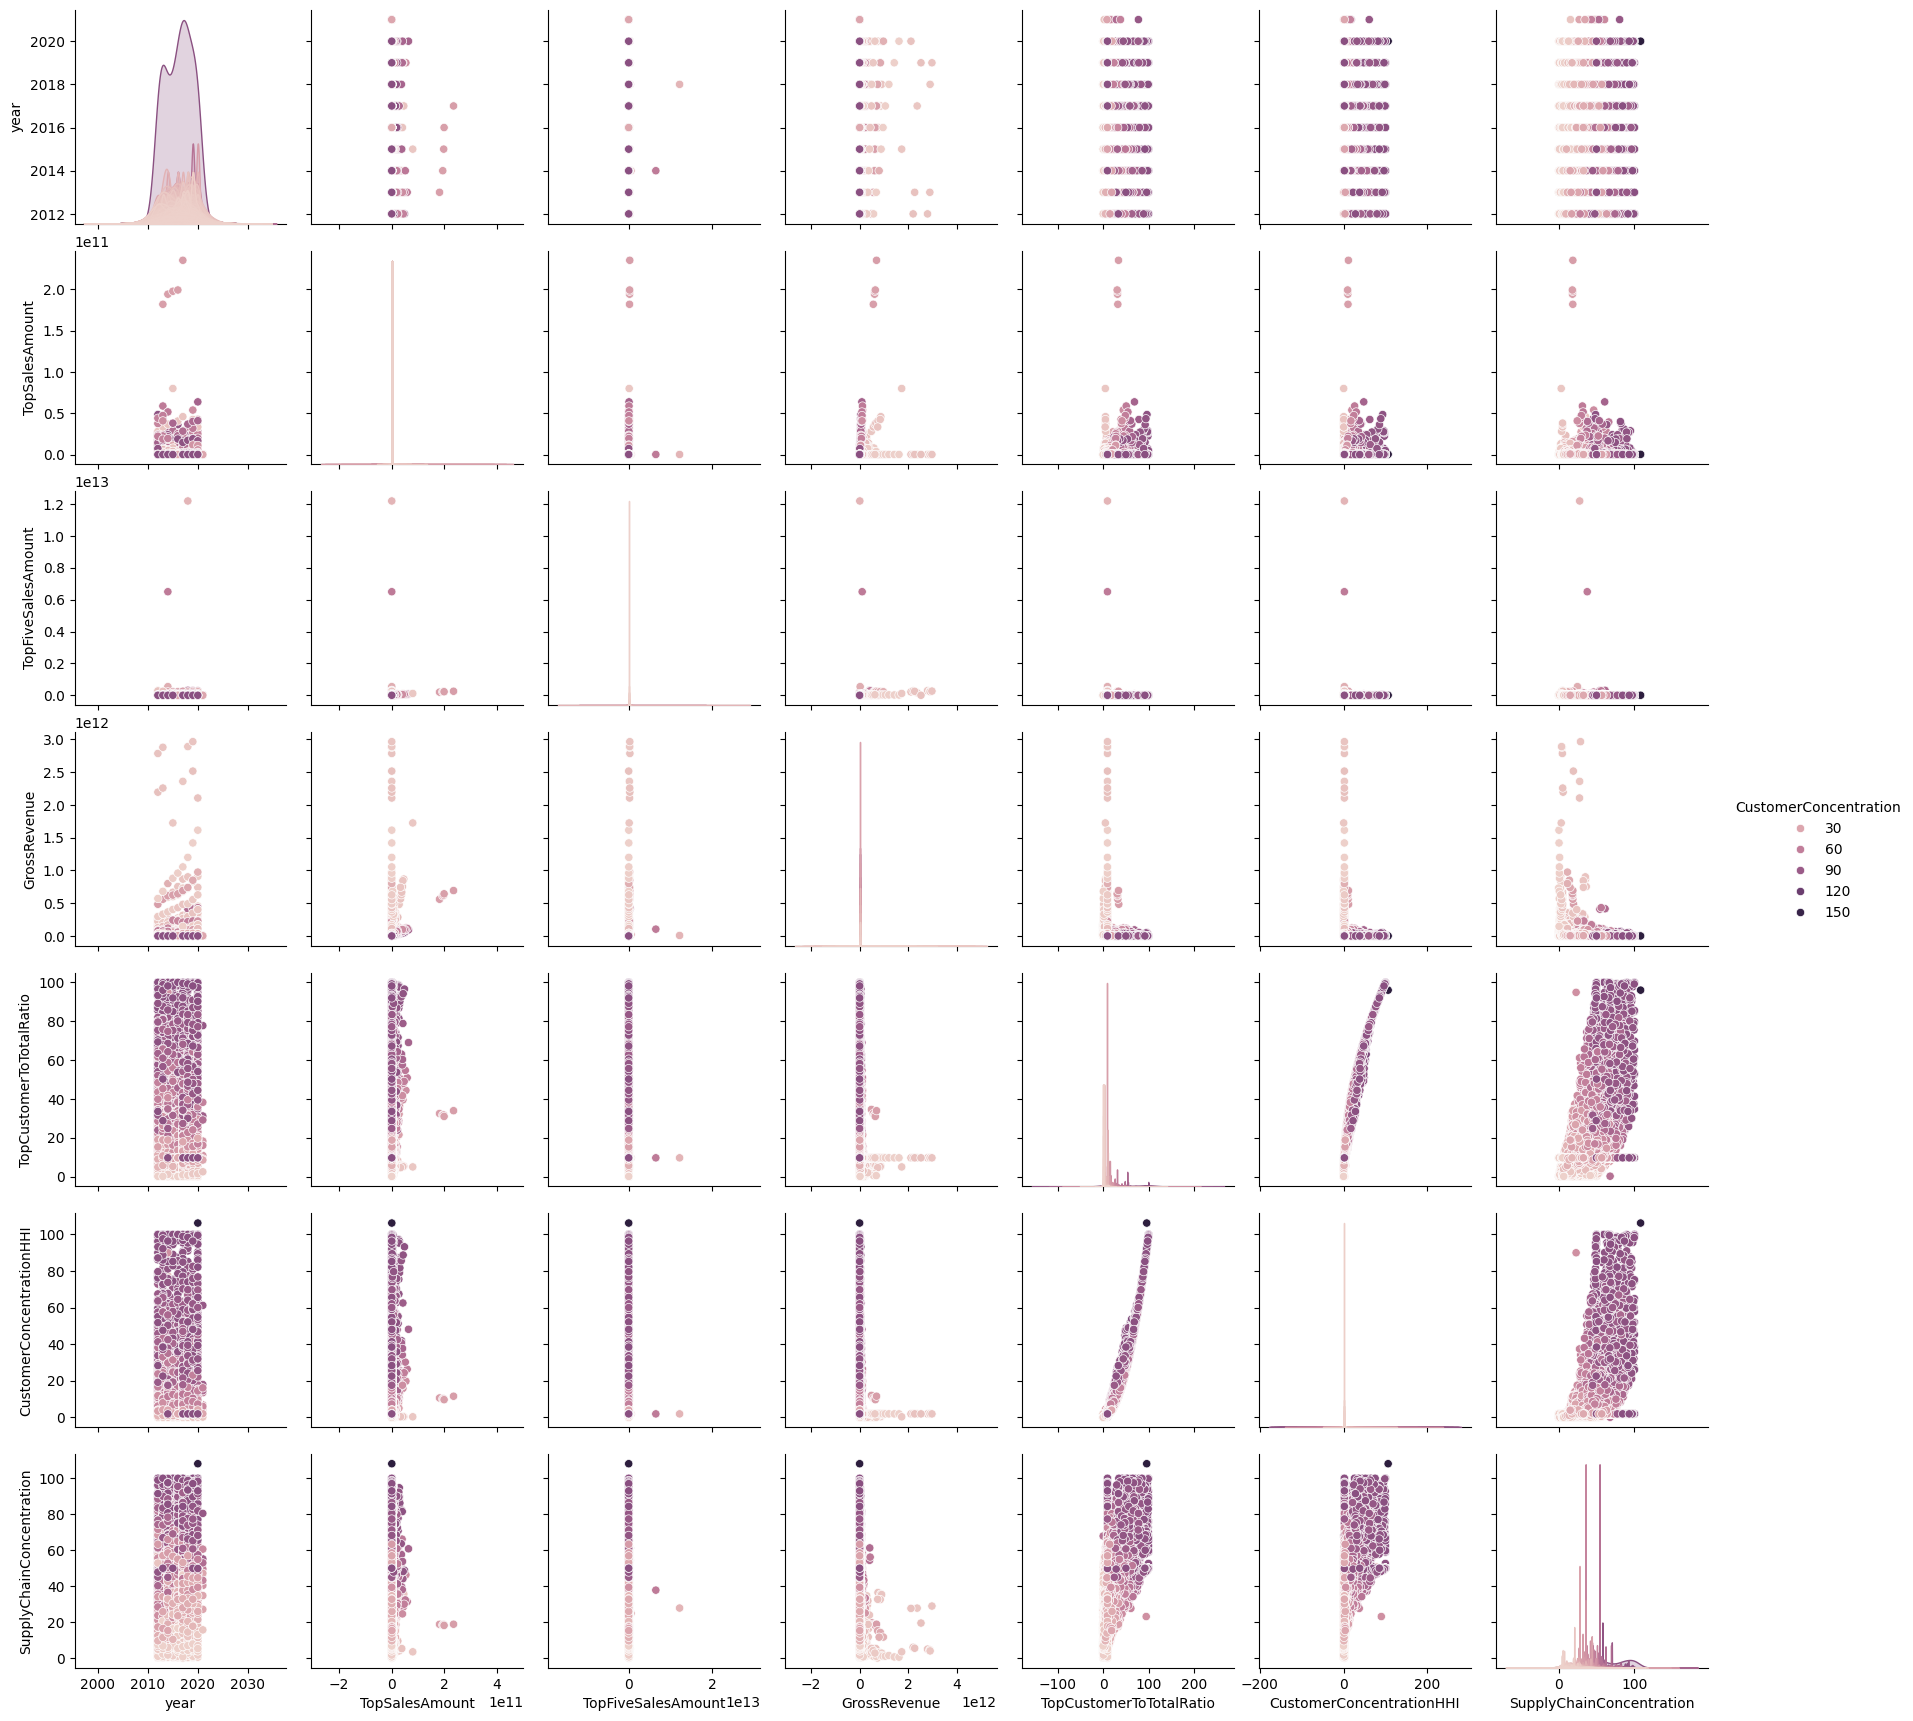

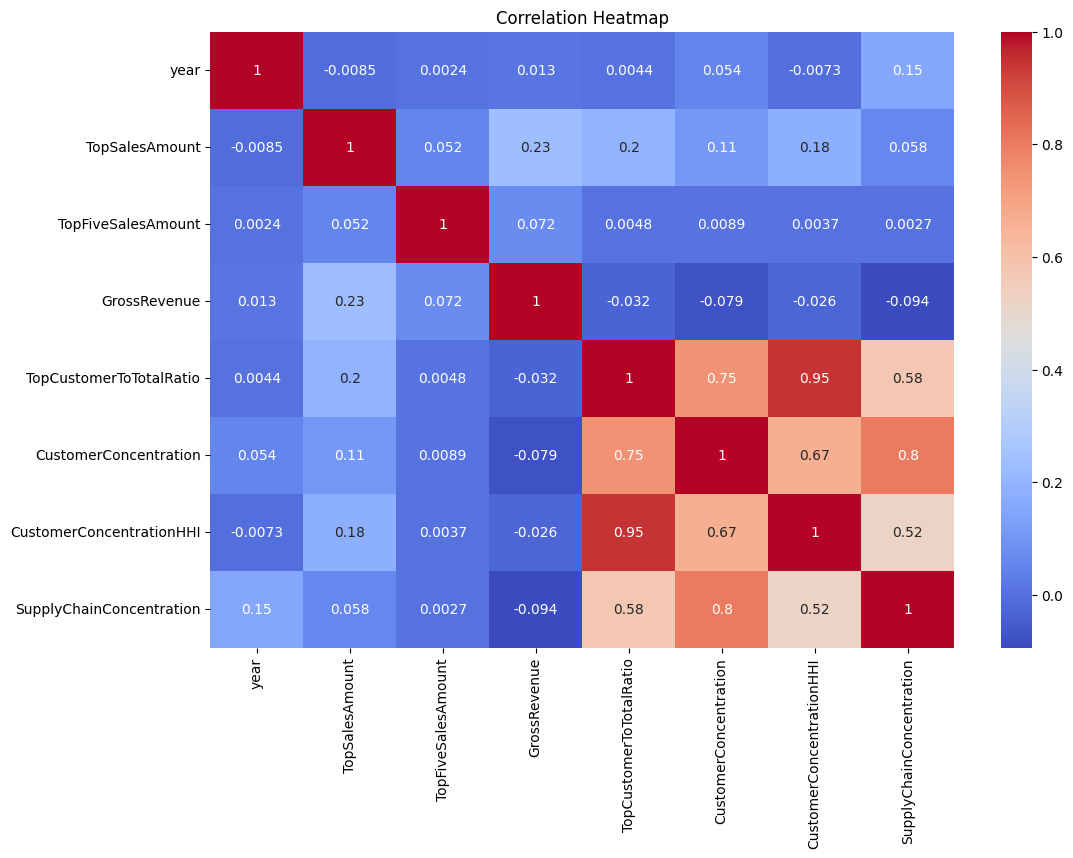

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='CustomerConcentration')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


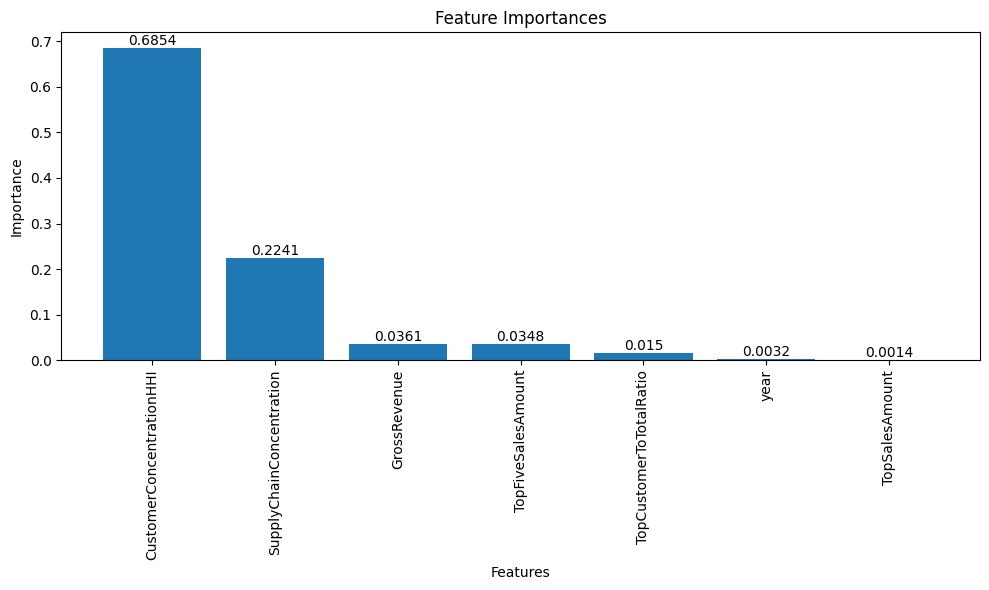

In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


# Importance for Select the desired features by column
# Select the desired features
selected_features = ['year', 'TopSalesAmount', 'TopFiveSalesAmount', 'GrossRevenue', 'TopCustomerToTotalRatio', 'CustomerConcentrationHHI', 'SupplyChainConcentration']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



Cross-Validation RMSE Scores: [3.73153869 3.93799163 4.17405064 3.9011703  3.88464077]
Mean Cross-Validation RMSE: 3.925878406037768


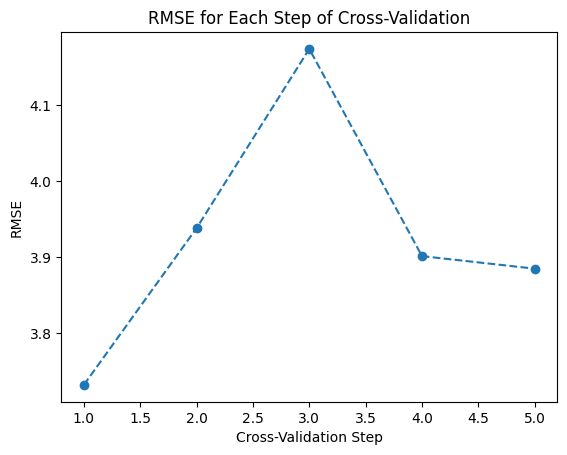

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 16.092624037578872
Mean Absolute Error: 1.7117013206162874


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 13.51385152545747
Validation Mean Absolute Error: 1.6873802797523507


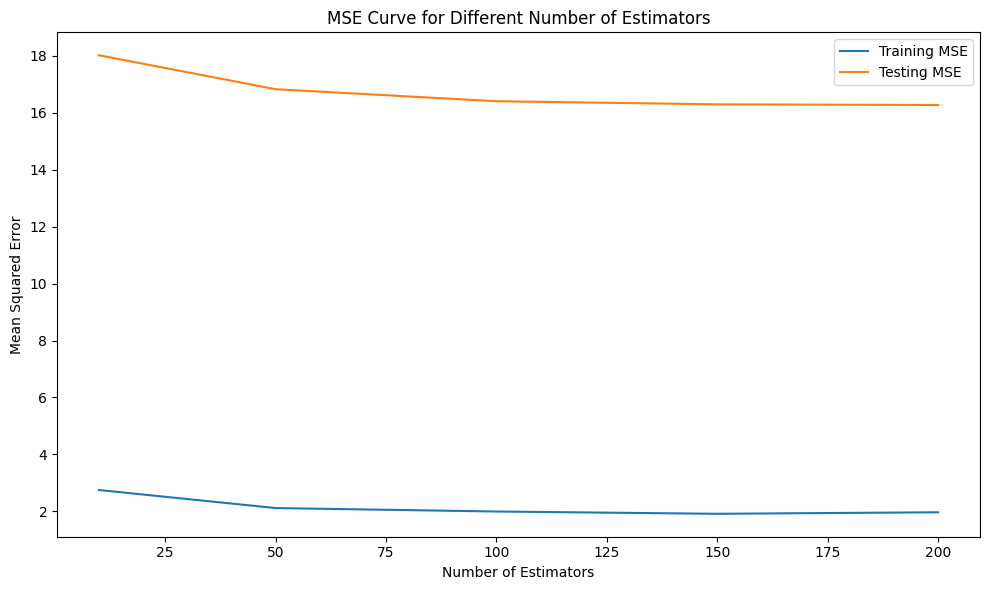

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


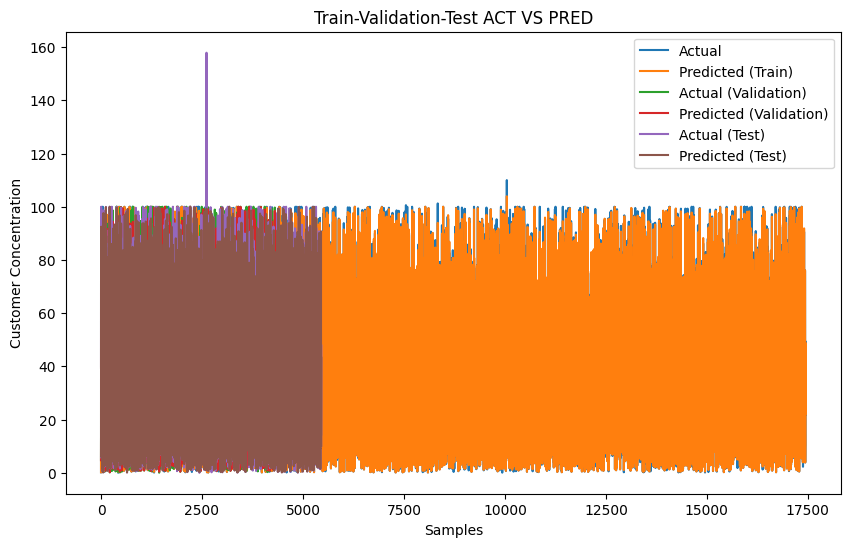

In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


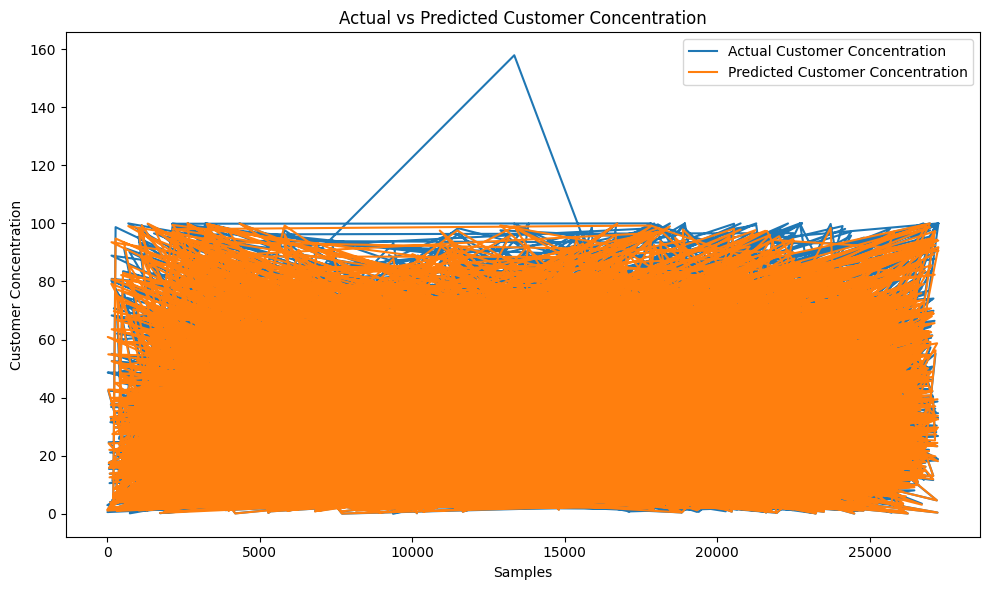

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


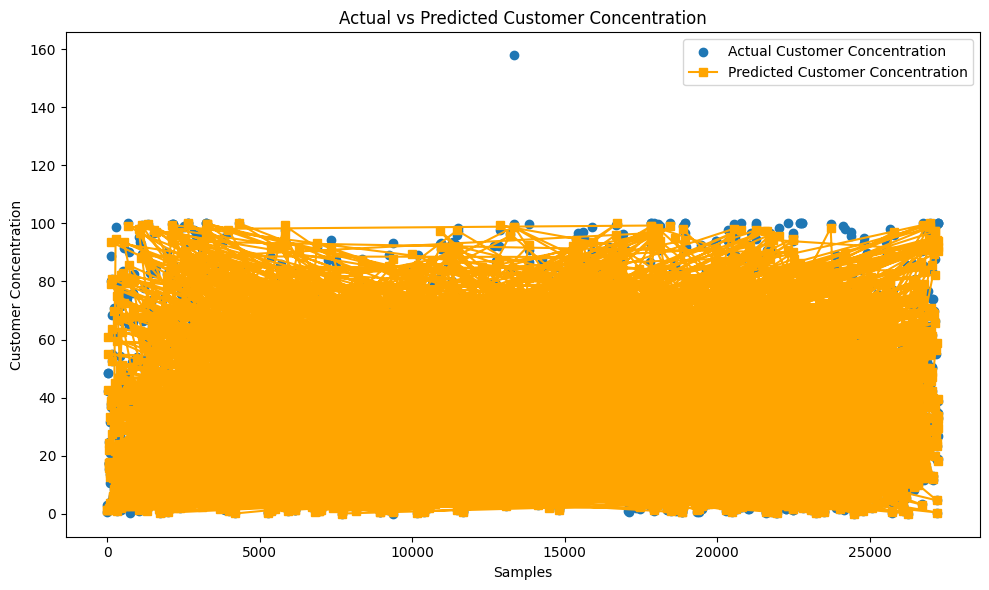

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 1.71
Mean Squared Error (MSE): 16.26
Root Mean Squared Error (RMSE): 4.03
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 8.07%


Cross-Validation RMSE Scores: [5.36615226 5.7768157  6.00241755 6.42931934 6.53985962]
Mean Cross-Validation RMSE: 6.022912893892437


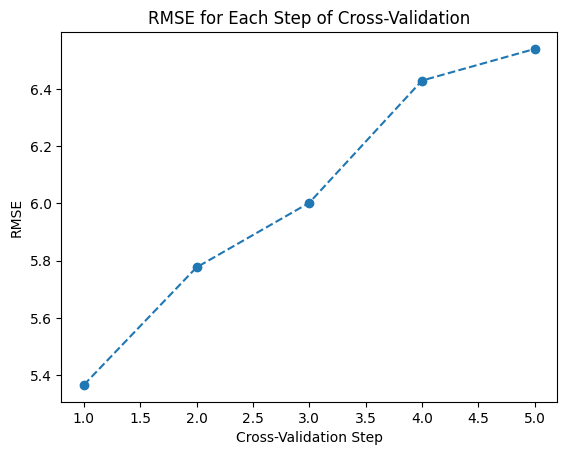

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 33.51109926852531
Mean Absolute Error: 2.0627604548789433


In [ ]:
# Predict on the validation set
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 31.24226733868379
Validation Mean Absolute Error: 2.103366200412749


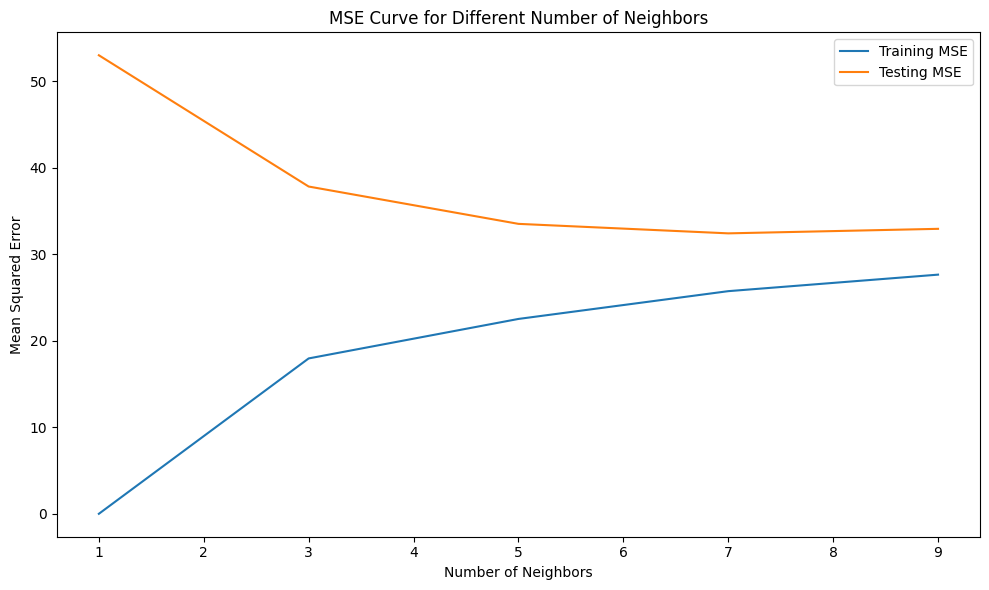

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

num_neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for k in num_neighbors:
    # Train the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, train_errors, label='Training MSE')
plt.plot(num_neighbors, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


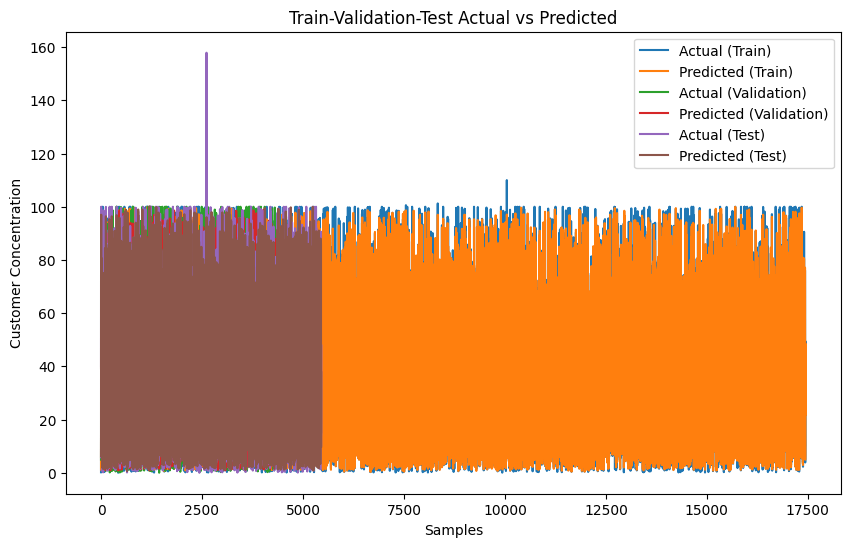

In [ ]:
# Calculate the training set predictions
y_pred_train = knn_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = knn_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = knn_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


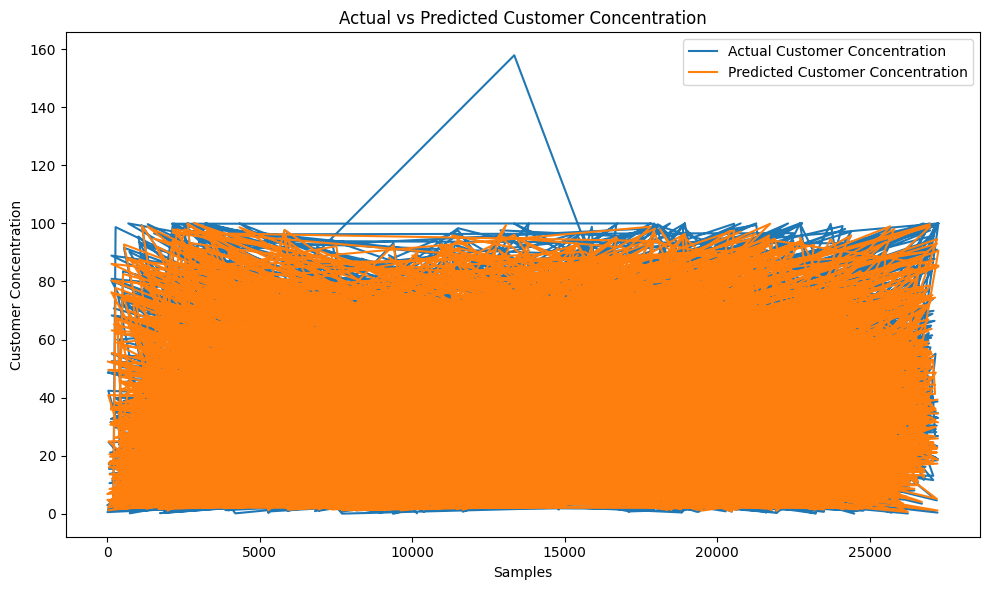

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


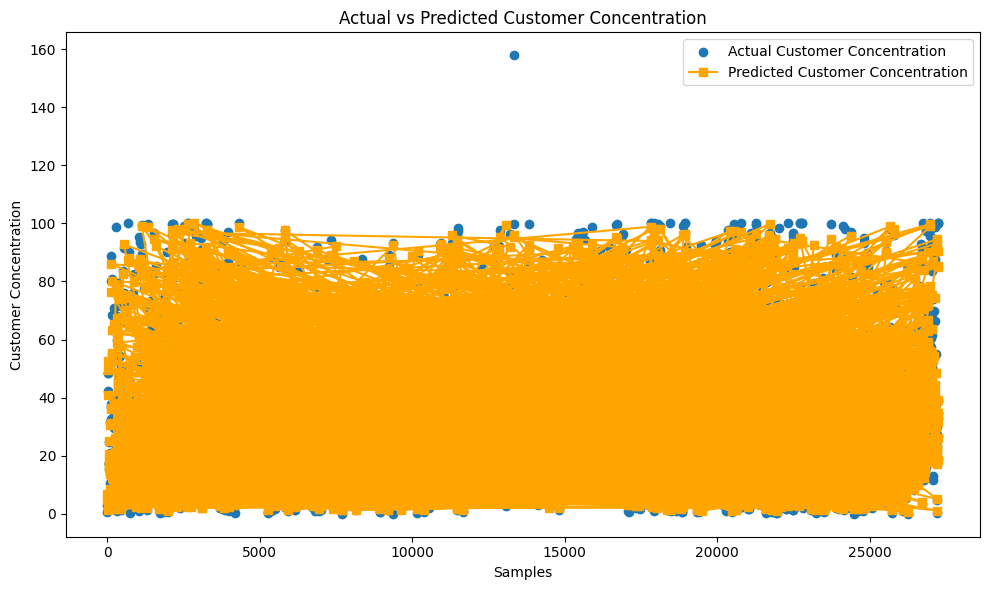

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 2.06
Mean Squared Error (MSE): 33.51
Root Mean Squared Error (RMSE): 5.79
R-squared (R2): 0.94
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 26.74%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Set hyperparameter values
n_neighbors = 7  # Number of neighbors to consider (you can adjust this)
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm to compute the nearest neighbors
leaf_size = 30  # Leaf size for the BallTree or KDTree
p = 2  # Power parameter for the Minkowski metric (2 for Euclidean distance)

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p
)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 1.95
Mean Squared Error (MSE): 32.34
Root Mean Squared Error (RMSE): 5.69
R-squared (R2): 0.94
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 23.57%


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 13955, number of used features: 7
[LightGBM] [Info] Start training from score 32.589183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set

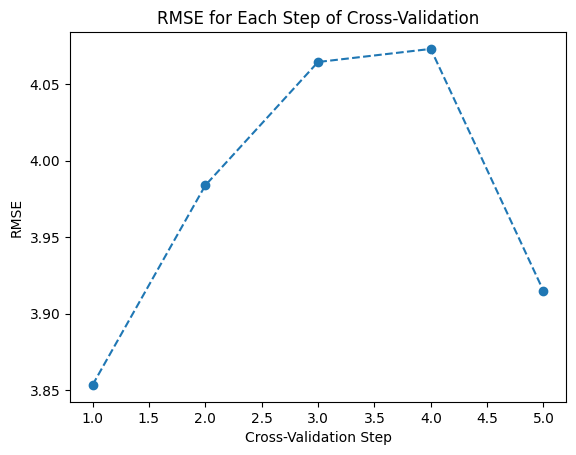

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

cv_scores = cross_val_score(lgbm_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have X_train, X_test, y_train, and y_test defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

# Predict on the test set
y_pred_test = lgbm_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start training from score 32.520210
Mean Squared Error: 18.648463329457666
Mean Absolute Error: 2.234555289919176


In [ ]:
# Predict on the validation set
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 16.29391575733363
Validation Mean Absolute Error: 2.2710015347565298


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start training from score 32.520210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start trai

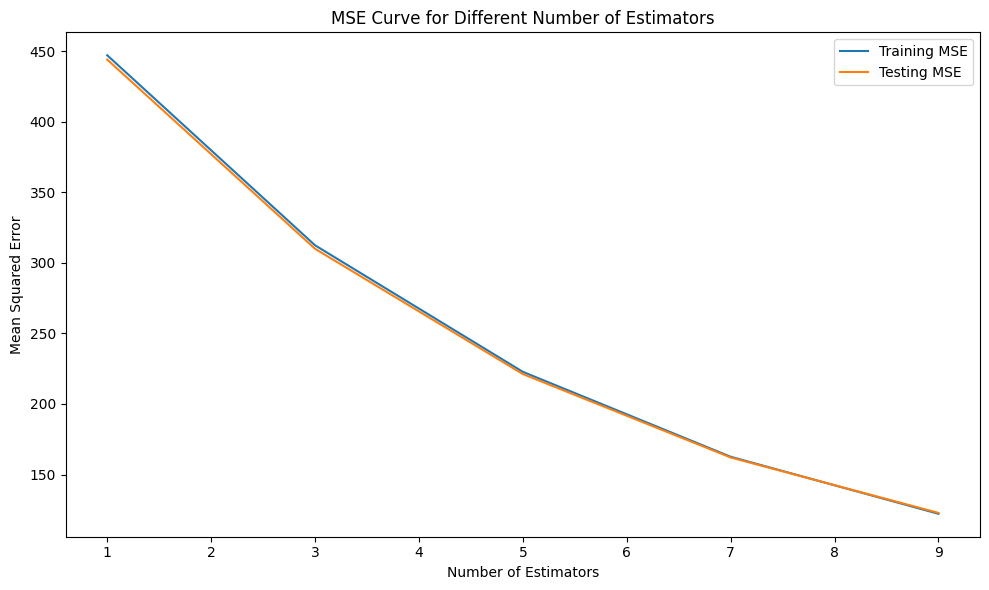

In [ ]:
from lightgbm import LGBMRegressor

num_estimators = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for n in num_estimators:
    # Train the LGBM regression model
    model = LGBMRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


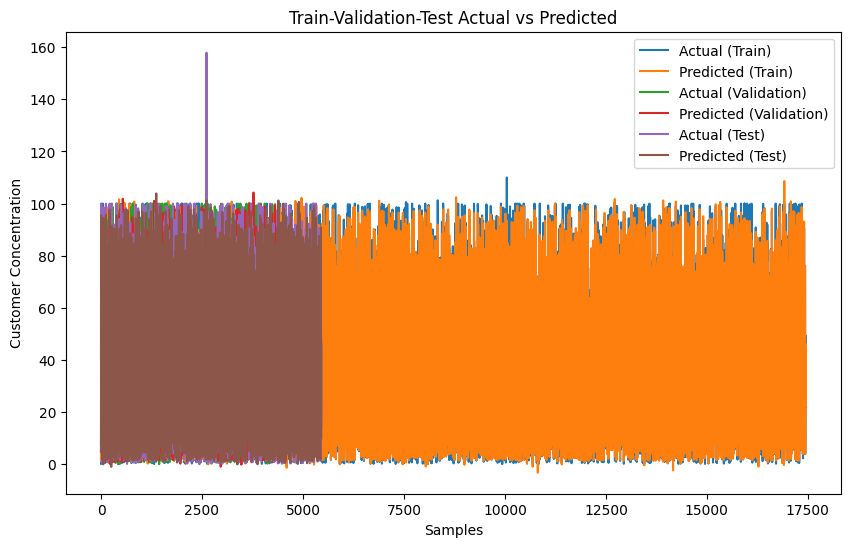

In [ ]:
# Calculate the training set predictions
y_pred_train = lgbm_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = lgbm_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


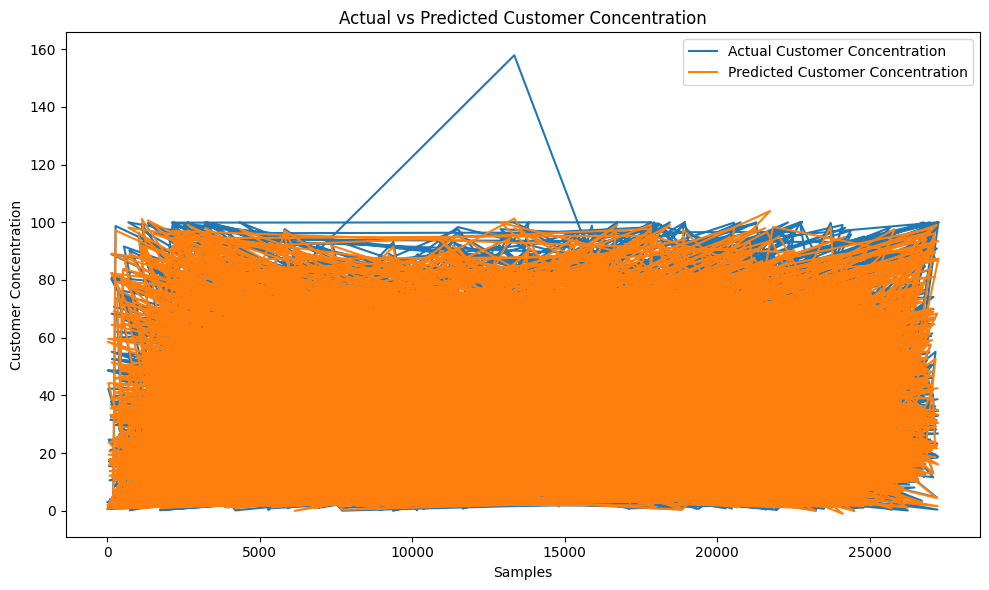

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


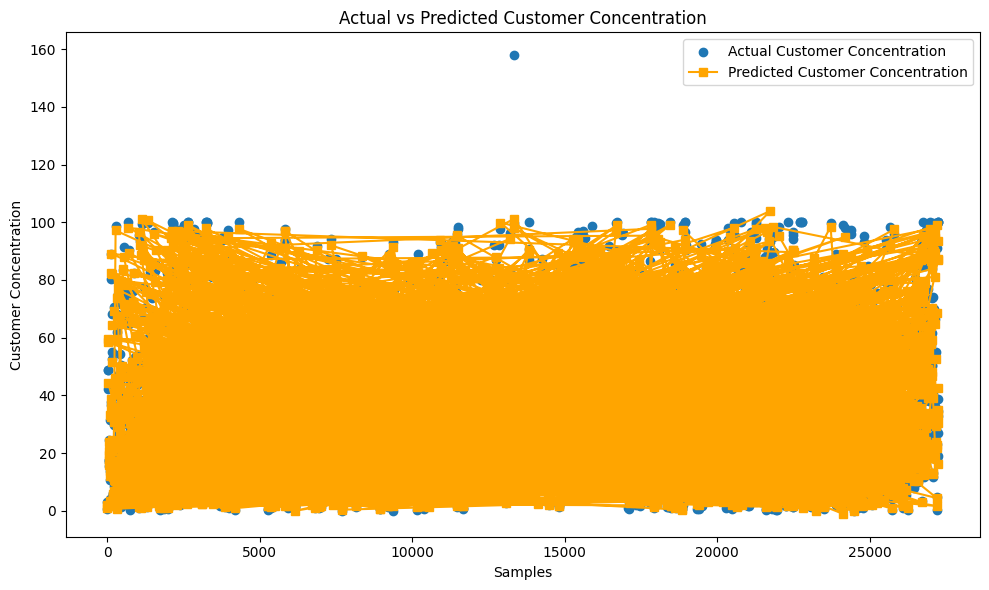

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 17444, number of used features: 7
[LightGBM] [Info] Start training from score 32.520210

LGBMRegressor Model:
Mean Absolute Error (MAE): 2.23
Mean Squared Error (MSE): 18.65
Root Mean Squared Error (RMSE): 4.32
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 15.84%


<ipython-input-45-f2b9cf2c588a>:14: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)


Cross-Validation RMSE Scores: [22.27590152 22.41037588 23.09349886 22.17882535 21.35201477]
Mean Cross-Validation RMSE: 22.262123276367735


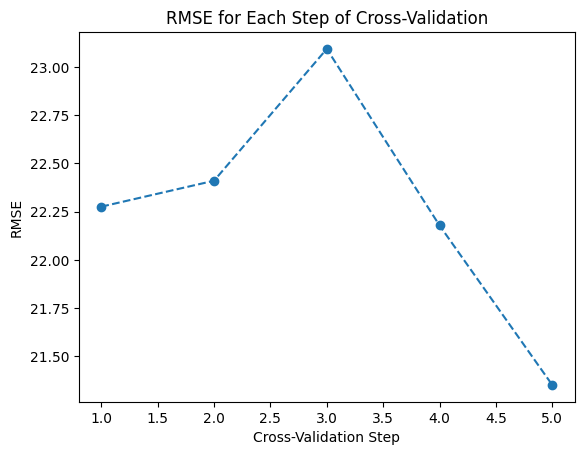

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Assuming X_val and y_val are defined

# Predict on the validation set
y_pred_val = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 507.2045204860373
Validation Mean Absolute Error: 16.533323135182183


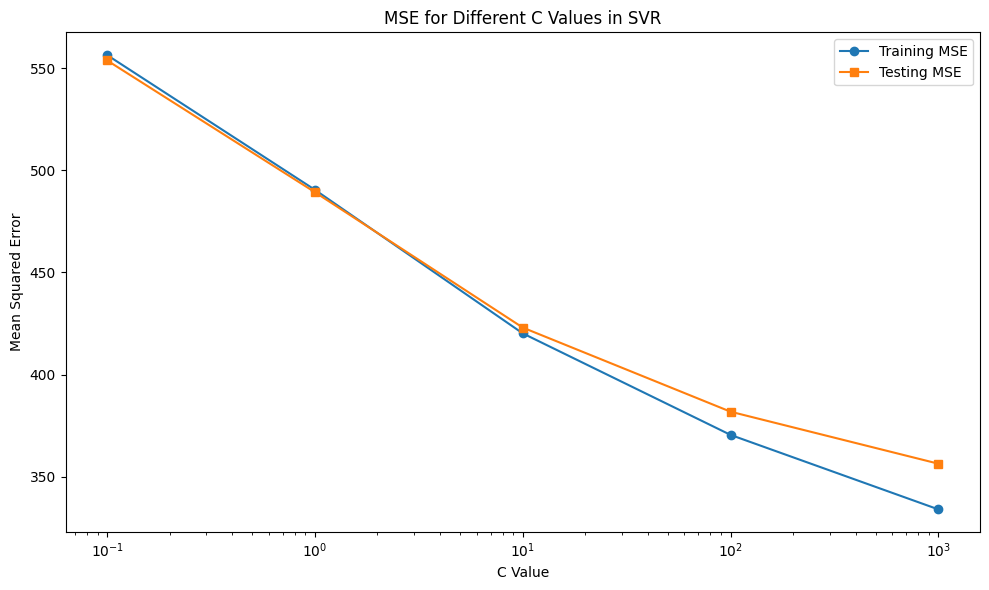

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Instead of num_estimators, we'll use a range of C values for SVR
C_values = [0.1, 1, 10, 100, 1000]
train_errors = []
test_errors = []

for C in C_values:
    # Initialize and train the SVR model with the current C value
    model = SVR(C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and append the mean squared errors for both sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training MSE', marker='o')
plt.plot(C_values, test_errors, label='Testing MSE', marker='s')
plt.title('MSE for Different C Values in SVR')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # C values span several orders of magnitude
plt.legend()
plt.tight_layout()
plt.show()


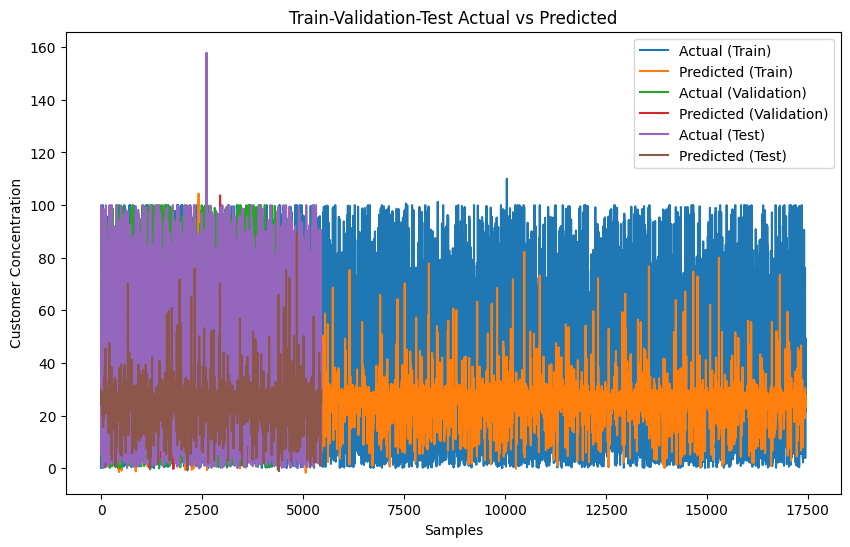

In [ ]:
# Calculate the training set predictions
y_pred_train = svr_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = svr_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = svr_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


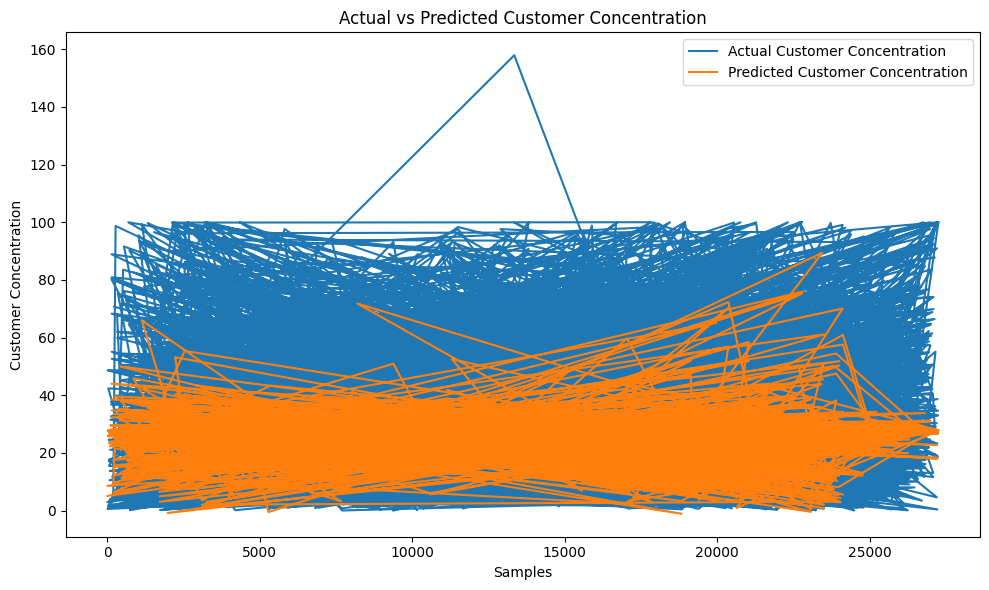

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


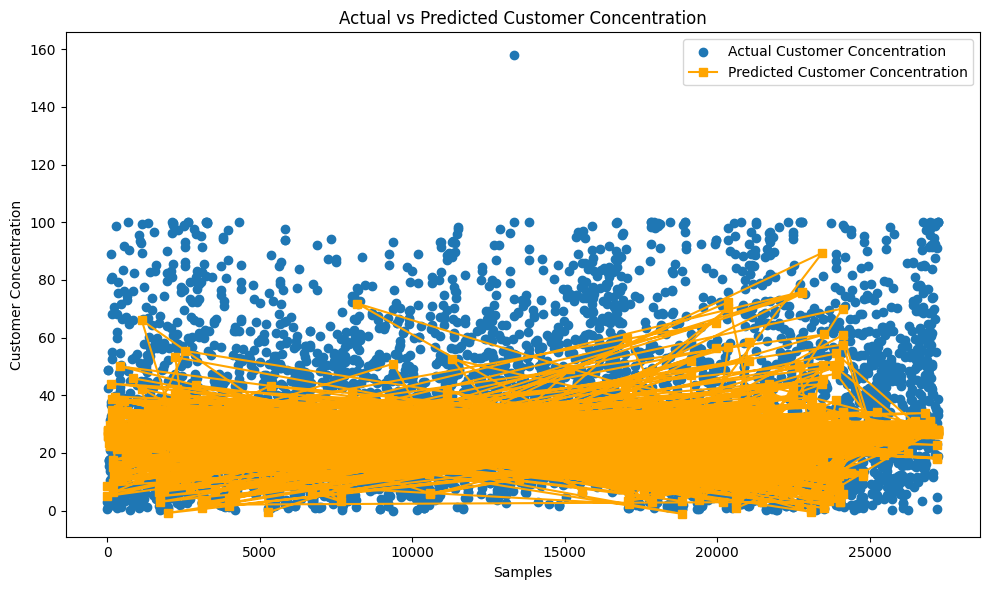

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 16.22
Mean Squared Error (MSE): 489.23
Root Mean Squared Error (RMSE): 22.12
R-squared (R2): 0.09
Root Mean Squared Logarithmic Error (RMSLE): 0.06
Mean Absolute Percentage Error (MAPE): 172.61%


<ipython-input-5-13fb84c97ae3>:14: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)


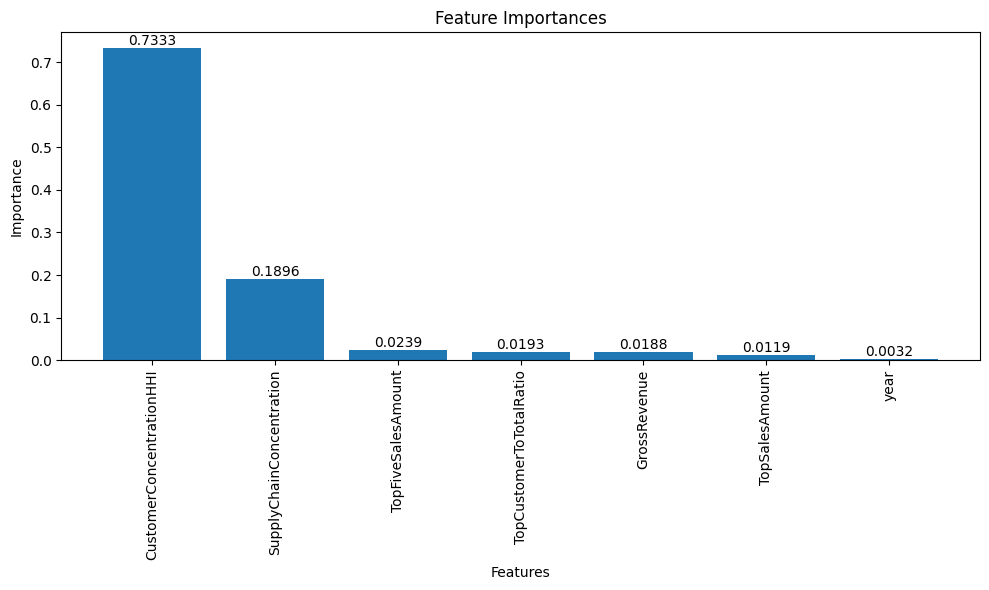

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the XGBRegressor model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Importance for selecting the desired features by column
selected_features = ['year', 'TopSalesAmount', 'TopFiveSalesAmount', 'GrossRevenue', 'TopCustomerToTotalRatio', 'CustomerConcentrationHHI', 'SupplyChainConcentration']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


Cross-Validation RMSE Scores: [3.51565487 3.25869645 3.6146565  3.83607104 3.76662912]
Mean Cross-Validation RMSE: 3.5983415936165626


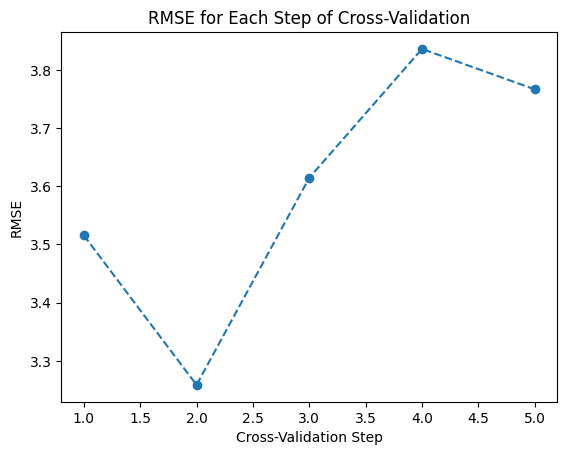

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Perform cross-validation with 5 folds using negative mean squared error as the scoring metric
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from negative MSE scores
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the XGBRegressor
y_pred_test = xgb_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 15.921898777004802
Mean Absolute Error: 1.8527316161381218


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the validation set using the XGBRegressor
y_pred_val = xgb_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 14.492214545105897
Validation Mean Absolute Error: 1.8632762576042716


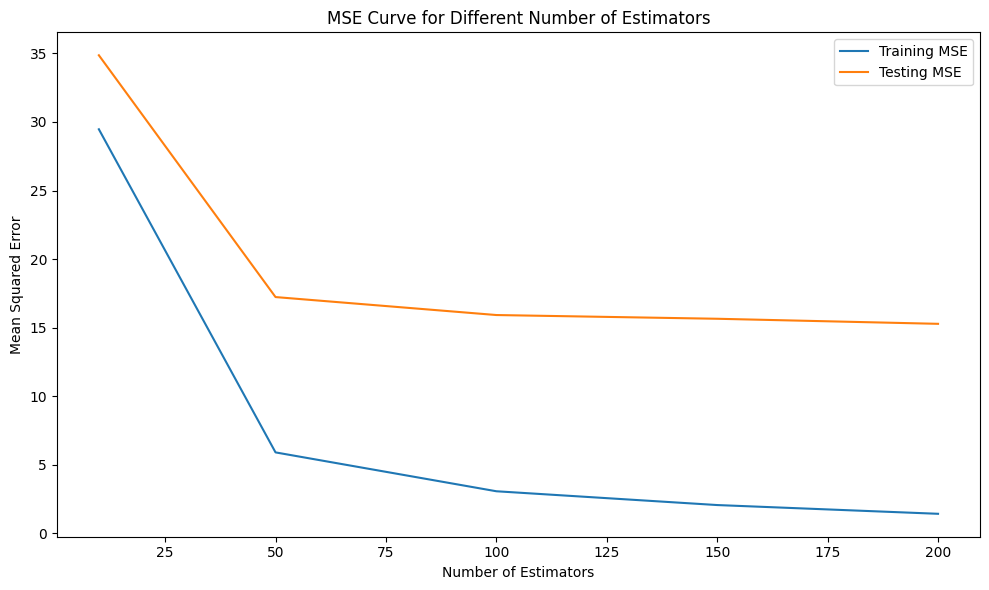

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_estimators:
    # Train the XGBRegressor model with different numbers of estimators
    model = xgb.XGBRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


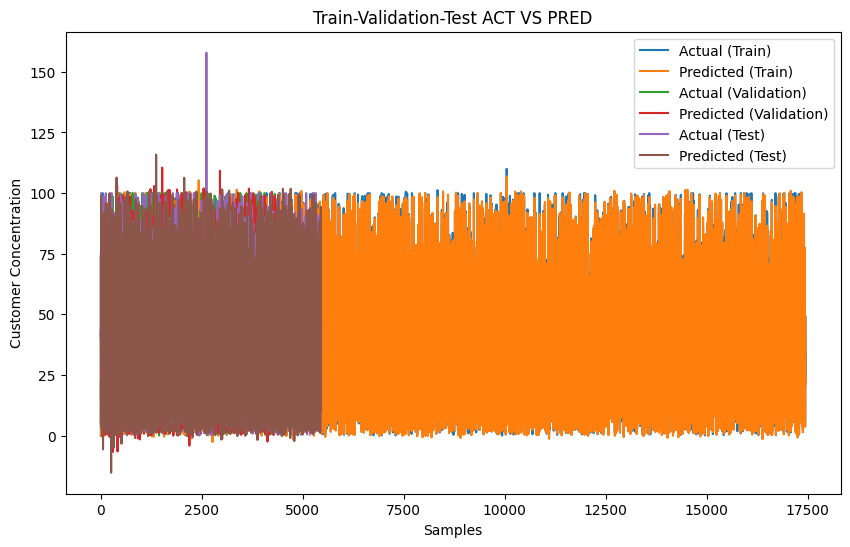

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Calculate the training set predictions
y_pred_train = xgb_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Predict on the validation and test sets
y_pred_val = xgb_regressor.predict(X_val)
y_pred_test = xgb_regressor.predict(X_test)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


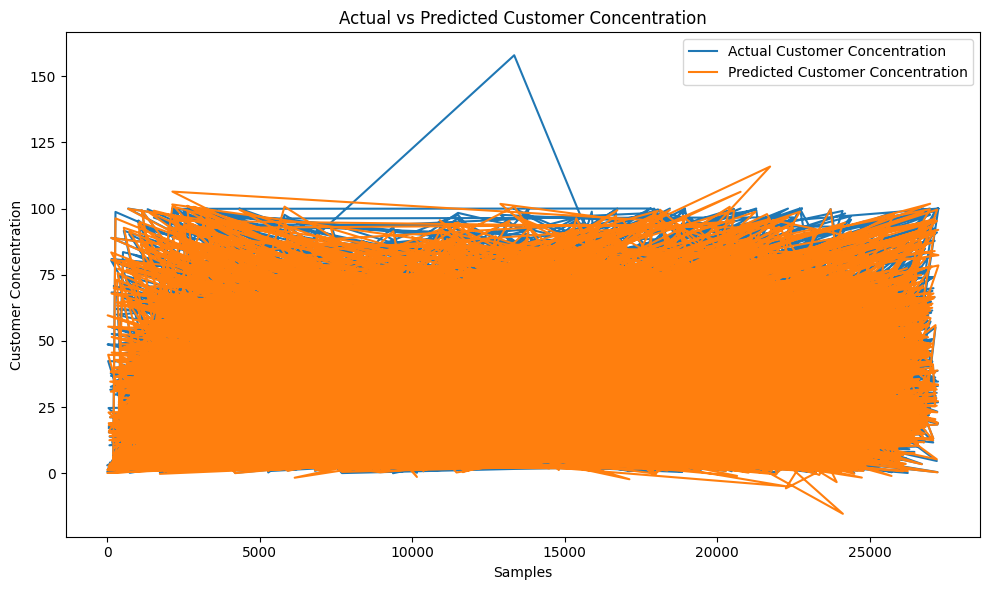

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


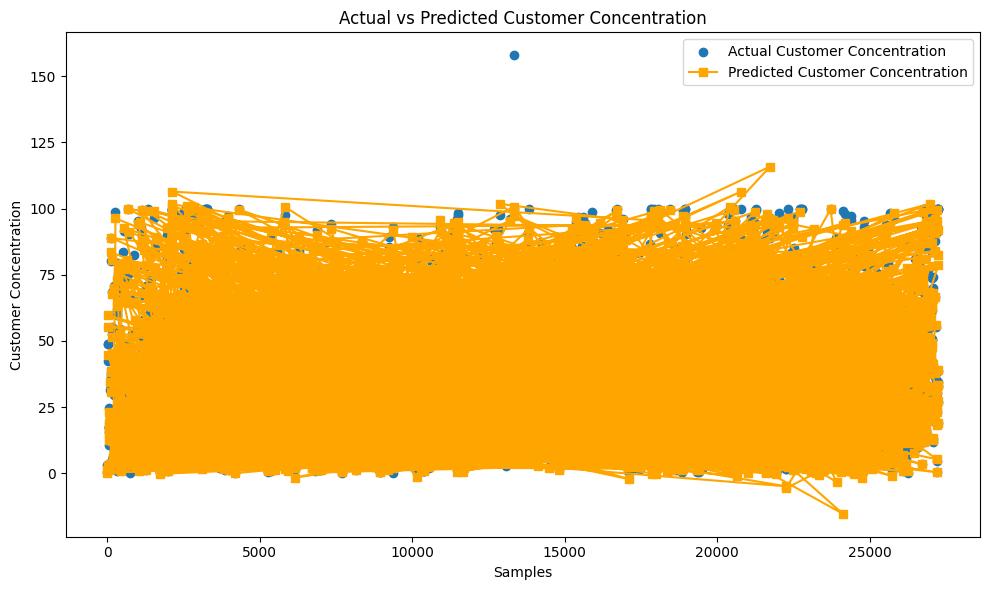

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate XGBRegressor with additional hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=num_estimators,
    learning_rate=0.05,  # Controls the step size for each boosting step
    max_depth=6,  # Maximum depth of a tree, increasing this can lead to overfitting
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators and Tuned Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 100 Estimators and Tuned Hyperparameters:
Mean Absolute Error (MAE): 2.92
Mean Squared Error (MSE): 27.85
Root Mean Squared Error (RMSE): 5.28
R-squared (R2): 0.95
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 29.90%


<ipython-input-15-542ff993b302>:26: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
